In [1]:
library(readr)
library(caret)
library(randomForest)

Loading required package: lattice
Loading required package: ggplot2
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
df = read_csv("/home/data/pqrscores.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  NPI = col_integer(),
  `Graduation year` = col_integer(),
  `Number of Group Practice members` = col_integer(),
  `Phone Number` = col_double(),
  depression = col_integer(),
  tobacco = col_integer(),
  weight = col_integer(),
  bloodpressure = col_integer(),
  comparingmeds = col_integer()
)
See spec(...) for full column specifications.


In [3]:
#dfs=df[,c("Gender","Medical school name","Graduation year","Primary specialty","Number of Group Practice members","State","tobacco")]
dfs=df[,c("Gender","Graduation year","Number of Group Practice members","State","tobacco")]
head(dfs)


Gender,Graduation year,Number of Group Practice members,State,tobacco
M,1981,7,OR,NA
F,1984,NA,NY,33
M,2008,2,WV,NA
M,1994,NA,NY,55
M,1985,NA,MA,NA
M,2008,7,IL,100


In [4]:
dfs[,"yearexp"]=2017 - dfs[,"Graduation year"]
#dfs[,"tobacco"]=log(dfs[,"tobacco"])
dfs[,"Graduation year"] = NULL
colnames(dfs)=c("gender","groupnum","state","tobacco","yearexp")


head(dfs)

gender,groupnum,state,tobacco,yearexp
M,7,OR,NA,36
F,NA,NY,33,33
M,2,WV,NA,9
M,NA,NY,55,23
M,NA,MA,NA,32
M,7,IL,100,9


In [5]:
dfs=na.omit(dfs)
summary(dfs)
dim(dfs)
head(dfs)



    gender             groupnum       state              tobacco      
 Length:55815       Min.   :   2   Length:55815       Min.   :  0.00  
 Class :character   1st Qu.:   8   Class :character   1st Qu.: 93.00  
 Mode  :character   Median :  50   Mode  :character   Median : 99.00  
                    Mean   : 471                      Mean   : 94.04  
                    3rd Qu.: 523                      3rd Qu.:100.00  
                    Max.   :7837                      Max.   :100.00  
    yearexp     
 Min.   : 3.00  
 1st Qu.:14.00  
 Median :23.00  
 Mean   :23.83  
 3rd Qu.:32.00  
 Max.   :69.00  

[1] 55815     5

gender,groupnum,state,tobacco,yearexp
M,7,IL,100,9
F,5,OK,100,36
M,2,TN,100,15
M,2,LA,100,16
M,2,NM,100,37
M,5,OR,100,15


In [6]:
#temp change because it is taking forever to run
dfs=dfs[dfs$state %in% c("MD","VA","DC","WV"),]
cols_to_factor = c("gender","state")
dfs[cols_to_factor] = lapply(dfs[cols_to_factor],factor)
summary(dfs)
dfs=dfs[1:1000,]

 gender      groupnum      state        tobacco          yearexp     
 F: 693   Min.   :   2.0   DC: 152   Min.   :  0.00   Min.   : 3.00  
 M:1977   1st Qu.:   7.0   MD: 766   1st Qu.: 98.00   1st Qu.:16.00  
          Median :  27.0   VA:1538   Median :100.00   Median :23.00  
          Mean   : 137.7   WV: 214   Mean   : 97.02   Mean   :24.67  
          3rd Qu.:  83.0             3rd Qu.:100.00   3rd Qu.:33.00  
          Max.   :2485.0             Max.   :100.00   Max.   :59.00  

In [7]:
a = createDataPartition(dfs$tobacco,p=0.8,list=FALSE)
train = dfs[a,]
test = dfs[-a,]
dim(train)

[1] 801   5

In [8]:
#rf = train(tobacco~.,data=train,method="rf")
rf=randomForest(tobacco~.,data=train,importance=TRUE,proximity=TRUE)


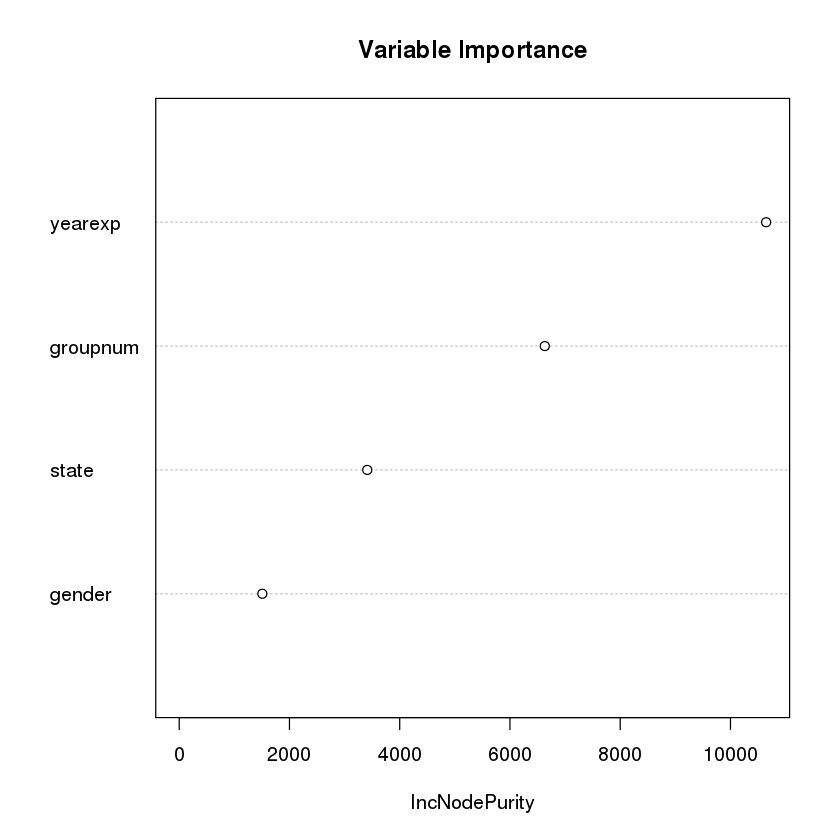

In [9]:
varImpPlot(rf,type = 2,main = "Variable Importance",col = 'black')

In [16]:
prediction=predict(rf,test)


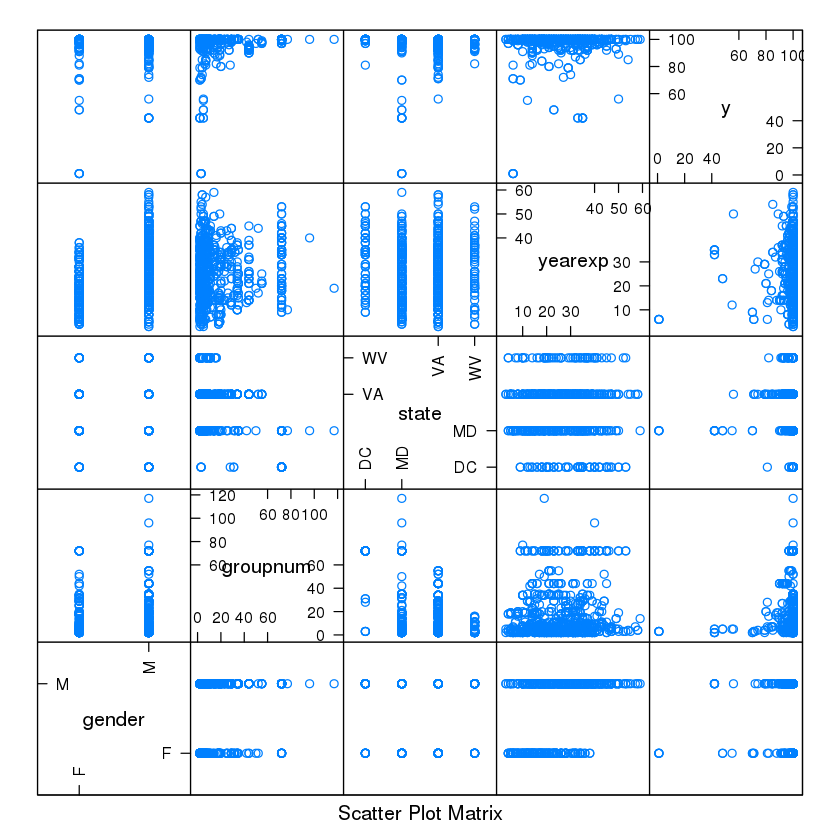

In [11]:
featurePlot(x=train[,c("gender","groupnum","state","yearexp")],y = train$tobacco,plot="pairs")

In [12]:
dfc = test
dfc[,"prediction"] = prediction
str(dfc)



Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	199 obs. of  6 variables:
 $ gender    : Factor w/ 2 levels "F","M": 1 1 2 1 1 1 1 1 2 2 ...
 $ groupnum  : int  4 5 2 2 2 19 5 4 3 6 ...
 $ state     : Factor w/ 4 levels "DC","MD","VA",..: 3 2 3 3 4 1 2 3 3 2 ...
 $ tobacco   : int  100 100 100 100 100 100 55 100 99 100 ...
 $ yearexp   : num  12 22 32 15 8 26 12 24 34 14 ...
 $ prediction: num  98.6 91.7 98 98.5 97.8 ...


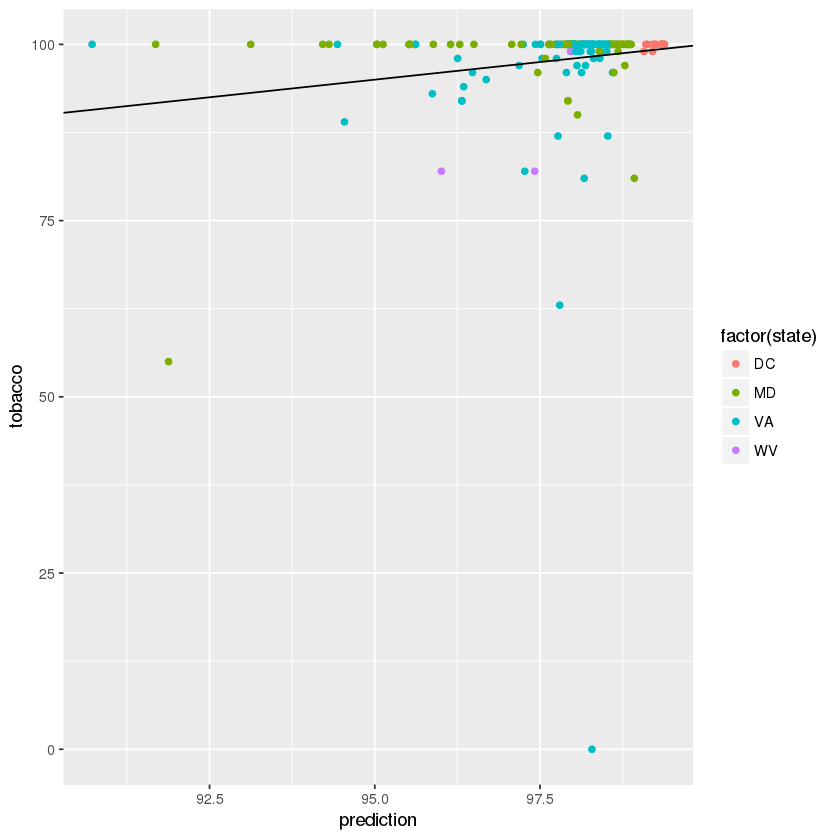

In [14]:

ggplot(dfc, aes(prediction, tobacco)) + geom_point(aes(colour = factor(state)))+
geom_abline(intercept = 0, slope = 1)

In [21]:
library(miscTools)
cols= colnames(test)
r2 = rSquared(test$tobacco, test$tobacco - predict(rf, test[,cols]))
r2

0.01971528


In [23]:
mse = mean((test$tobacco - predict(rf, test[,cols]))^2)
mse

[1] 75.21941